In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# %matplotlib inline

In [112]:
data = pd.read_csv('data\movie_metadata_cleaned.csv')

In [113]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

In [114]:
directors_group = data.groupby("director_name").agg({'gross':['count','sum']})
top_10 = gross_by_director.sort_values("count", ascending=False)[1:11]
top_10[['', 'count']]

,,count
2159,Steven Spielberg,26
2378,Woody Allen,22
392,Clint Eastwood,20
1478,Martin Scorsese,20
1903,Ridley Scott,17
2158,Steven Soderbergh,16
2102,Spike Lee,16
2221,Tim Burton,16
1862,Renny Harlin,15
1701,Oliver Stone,14


{'whiskers': [<matplotlib.lines.Line2D at 0x1b7cc1959d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b7cc195f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b7cc195700>],
 'medians': [<matplotlib.lines.Line2D at 0x1b7cc1a5550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b7cc1a5820>],
 'means': []}

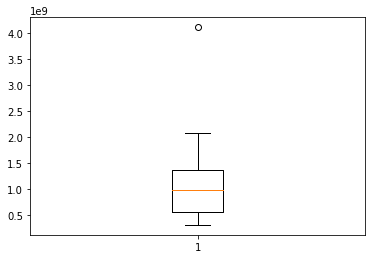

In [115]:
plt.boxplot(top_10["sum"])

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

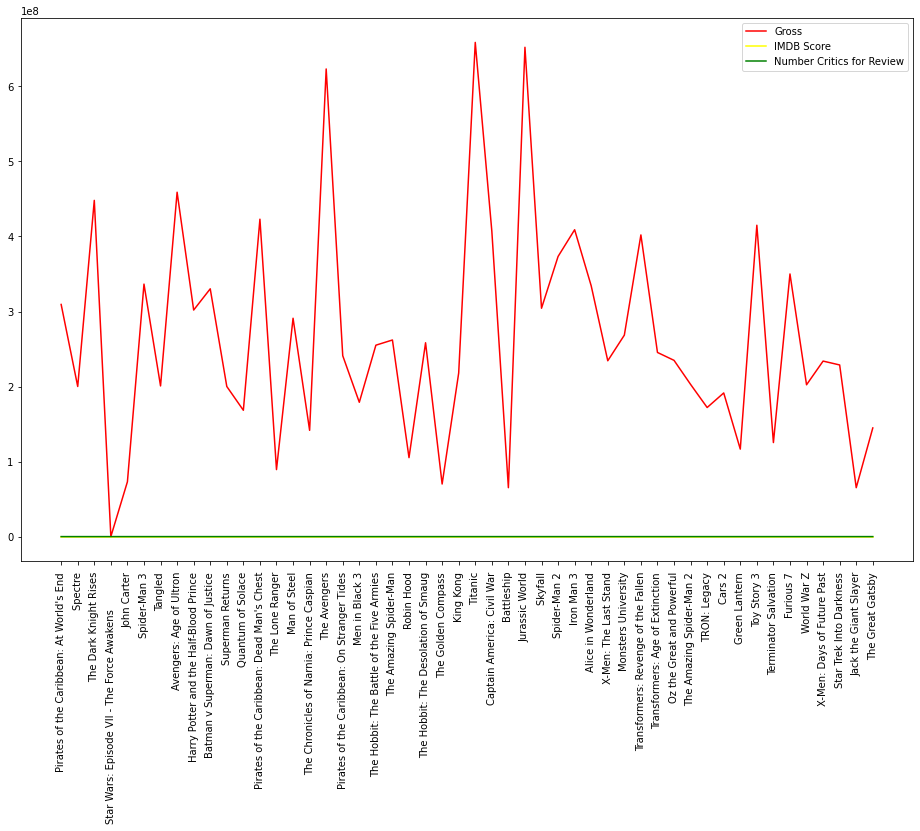

In [116]:
table_data = data[['movie_title', 'gross', 'imdb_score', 'num_critic_for_reviews']][1:51]
plt.figure(figsize=(16,10)) 
plt.plot(table_data.movie_title, table_data.gross, label = "Gross", color="red")
plt.plot(table_data.movie_title, table_data.imdb_score, label = "IMDB Score", color="yellow")
plt.plot(table_data.movie_title, table_data.num_critic_for_reviews, label = "Number Critics for Review", color="green")
plt.xticks(rotation=90)

plt.legend()

## Compute Sales (Gross - Budget), add it as another column

In [119]:
data["sales"] = data["gross"]-data["budget"]
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales
0,0,Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0
1,1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0


## Which directors garnered the most total sales?

In [120]:
table_data = data[["director_name", "sales"]]
directors_totalsales = table_data.groupby("director_name").sum().sort_values("sales",ascending=False)[:5]
directors_totalsales

,sales
director_name,
Steven Spielberg,2.451332e+09
George Lucas,1.386641e+09
James Cameron,1.199626e+09
Joss Whedon,1.000887e+09
Chris Columbus,9.417076e+08


## Plot sales and average likes as a scatterplot. Fit it with a line.

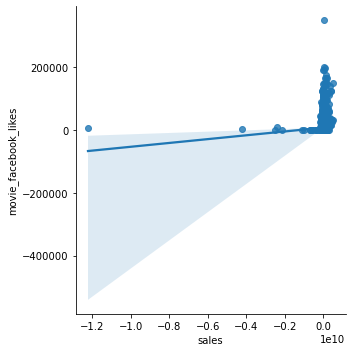

In [121]:
sns.lmplot(x="sales", y="movie_facebook_likes", data=data)

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [122]:
data["average_actor_likes"] = data[["actor_1_facebook_likes", "actor_2_facebook_likes", "actor_3_facebook_likes"]].mean(axis=1)
data.head(5)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes
0,0,Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333
1,1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333
2,2,Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,3851.333333
3,3,The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,24333.333333
4,4,Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,47.666667


## Copying the whole dataframe

In [123]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes
0,0,Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333
1,1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333
2,2,Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,3851.333333
3,3,The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,24333.333333
4,4,Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,47.666667


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [124]:
for i in df.columns:
    if df[i].dtype == float:
        min = df[i].min()
        max = df[i].max()
        df[i] = (df[i]-min)/(max-min)
df.head(5)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes
0,0,Avatar,Color,James Cameron,0.889299,0.941799,0.000000,0.037174,Joel David Moore,0.001563,...,USA,PG-13,0.019402,0.996528,0.006832,0.831579,0.111250,0.094556,1.000000,0.004261
1,1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,0.371464,0.894180,0.024478,0.043478,Orlando Bloom,0.062500,...,USA,PG-13,0.024559,0.995536,0.036496,0.747368,0.146875,0.000000,0.959637,0.070229
2,2,Spectre,Color,Sam Mendes,0.740467,0.783069,0.000000,0.007000,Rory Kinnear,0.017188,...,UK,PG-13,0.020056,0.999504,0.002869,0.715789,0.146875,0.243553,0.955371,0.017640
3,3,The Dark Knight Rises,Color,Christopher Nolan,1.000000,0.867725,0.956522,1.000000,Christian Bale,0.042188,...,USA,PG-13,0.020466,0.998016,0.167883,0.894737,0.146875,0.469914,0.974454,0.111450
4,4,Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.000000,0.000000,0.005696,0.000000,Rob Walker,0.000205,...,0,0,0.000000,0.000000,0.000088,0.747368,0.000000,0.000000,0.958898,0.000218
